In [1]:
import sys
sys.path.append("../")
import caten as C

## Tensor Visualize

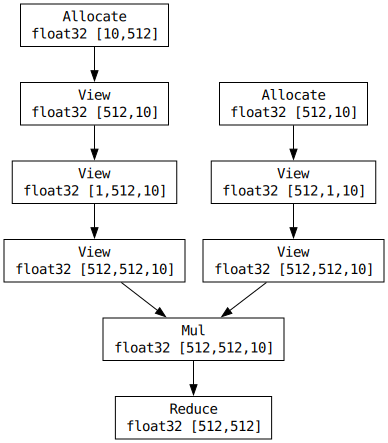

In [2]:
(C.Tensor([512, 10]) @ C.Tensor([10, 512])).dot()

In [3]:
print((C.Tensor([512, 10]) @ C.Tensor([10, 512])).viz())

(000) Reduce float32 [512,512] op=Add
  └─ (001) Mul float32 [512,512,10]
    ├─ (002) View float32 [512,512,10]
    │ └─ (003) View float32 [512,1,10]
    │   └─ (004) Allocate float32 [512,10]
    └─ (005) View float32 [512,512,10]
      └─ (006) View float32 [1,512,10]
        └─ (007) View float32 [512,10]
          └─ (008) Allocate float32 [10,512]


## Symbolic Shape

In [19]:
A, B = C.Vars("A, B")
out = C.Tensor([A, B]) + C.Tensor([A, B])
out.reshape([A, 1, B])

ValueError: size mismatch, can't reshape ((Const(args=(), T=ATenOpType(axes=(), dtype=DType(name='int64'), offset=None), value='A'), Const(args=(), T=ATenOpType(axes=(), dtype=DType(name='int64'), offset=None), value='B'))) -> ((Const(args=(), T=ATenOpType(axes=(), dtype=DType(name='int64'), offset=None), value='A'), 1, Const(args=(), T=ATenOpType(axes=(), dtype=DType(name='int64'), offset=None), value='B')))

## For-Loop Style Frontend

In [3]:
M, N, K = C.Vars("M, N, K")
@C.kernel()
def matmul(a: C.Tensor[M, N], b: C.Tensor[N, K]):
    out = C.Tensor[M, K]
    with C.range(M) as i:
        with C.range(N) as j:
            with C.range(K) as k:
                acc[i, j] += a[i, n] * b[j, k]
    return out

@C.kernel()
def diag(x: C.Tensor[M, N]):
    with C.range(M) as i:
        with C.range(N) as j:
            with C.when(i < j):
                x[i, j] = 1.0